In [1]:
import pandas as pd
import uproot
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import crystalball
from scipy.optimize import curve_fit,Bounds
from scipy.integrate import simps
import zfit_physics as zphysics
import zfit
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import mplhep
import uncertainties 
from uncertainties import ufloat
import tensorflow as tf

plt.style.use('belle2')
#%jsroot on


%run /afs/desy.de/user/j/jipatel/MT/MC_fit/Files_After_Acceptance/Signal_Background_thesis_final/Function.ipynb

2024-07-18 20:37:00.676159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 20:37:00.728871: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-18 20:37:00.729753: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-18 20:37:01.929025: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/afs/desy.de/user/j/jipatel/.local/lib/python3.8/site-packages/zfit/__init__.py:63: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warnin

In [2]:
file_bkg="/pnfs/desy.de/belle/local/user/msobotzi/p5prime/FilesAfterAcceptance/MC15/background/Bpeepi04Streams.root"
file_signal="/pnfs/desy.de/belle/local/user/msobotzi/p5prime/FilesAfterAcceptance/MC15/signal/Bpeepi04Streams.root"

file_jpsi="/pnfs/desy.de/belle/local/user/msobotzi/jpsi/afterAcceptance/Bpeepi0.root"

file_gen_jpsi="/pnfs/desy.de/belle/local/user/msobotzi/jpsi/afterPreCals/MC521_pi0.root"


In [3]:
mc_ele_signal,mc_ele_bkg, mc_ele_signal_weight,mc_ele_bkg_weight = process_MC_data_combined(file_signal, file_bkg, 'ele', '521', 'pi0', 'ee', 11, 'rec521')

mc_signal_data, mc_ele_only_signal, mc_ele_scf, mc_signal_weight, mc_ele_only_signal_weight, mc_ele_scf_weight = process_MC_data_combined_jpsi(file_jpsi,'rec521')

mc_ele_signal_data_with_trim, mc_ele_signal_data_without_trim = angular_gen_data_JPsi(file_gen_jpsi, '521', 'pi0', 'ee', '11','rec521')


In [4]:
JPsi_fit_and_integrate(mc_ele_signal_data_with_trim, mc_ele_signal_data_without_trim, param_fl_start=0.5, param_s3_start=0.01, param_p5_start=0.02, floating=True)


/tmp/ipykernel_380270/2847017157.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phi_b_gr['phi_B'] = 2 * np.pi - phi_b_gr['phi_B']
2024-07-18 20:37:15.170452: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 218880000 exceeds 10% of free system memory.
2024-07-18 20:37:15.405390: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 218880000 exceeds 10% of free system memory.
2024-07-18 20:37:15.602629: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 218880000 exceeds 10% of free system memory.
2024-07-18 20:37:15.793826: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 218880000 exceeds 10% of free system memory.
2024-07-18 20:37:15.984531: W tensorflow/tsl/framework/cpu_a

name                   value  (rounded)        hesse    at limit
-------------------  ------------------  -----------  ----------
extended_0.39858862               13016  +/- 1.1e+02       False
param_fl_0.39858862            0.576365  +/-  0.0066       False
param_s3_0.39858862           0.0932395  +/-  0.0079       False
param_p5_0.39858862            -0.02364  +/-   0.019       False
Fit result valid:
True
name                   value  (rounded)        hesse    at limit
-------------------  ------------------  -----------  ----------
extended_0.23864946             15192.7  +/- 1.2e+02       False
param_fl_0.23864946            0.577354  +/-  0.0058       False
param_s3_0.23864946           0.0926555  +/-  0.0079       False
param_p5_0.23864946            -0.01678  +/-   0.018       False
Fit result valid:
True
Signal Events for with_trim in MC Data = 13016
Signal Events for without_trim  in MC Data = 15192
Integrated PDF with trim: 1.0794730639157524
Integrated PDF without trim: 1.

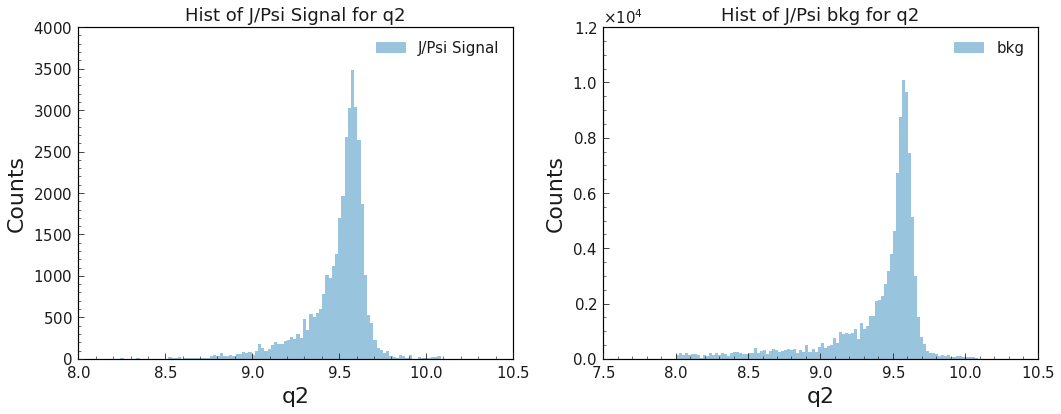

In [5]:
# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))


# q2_signal
plot_histogram(axs[0], {"J/Psi Signal": mc_ele_signal["q2"]}, ["J/Psi Signal"],
               {"J/Psi Signal": mc_ele_signal_weight}, 'q2', 'Counts', 'Hist of J/Psi Signal for q2')

# q2_bkg
plot_histogram(axs[1], {
                           "bkg": mc_ele_bkg["q2"]},
               ["bkg"],
               {"bkg": mc_ele_bkg_weight},
               'q2', 'Counts', 'Hist of J/Psi bkg for q2')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

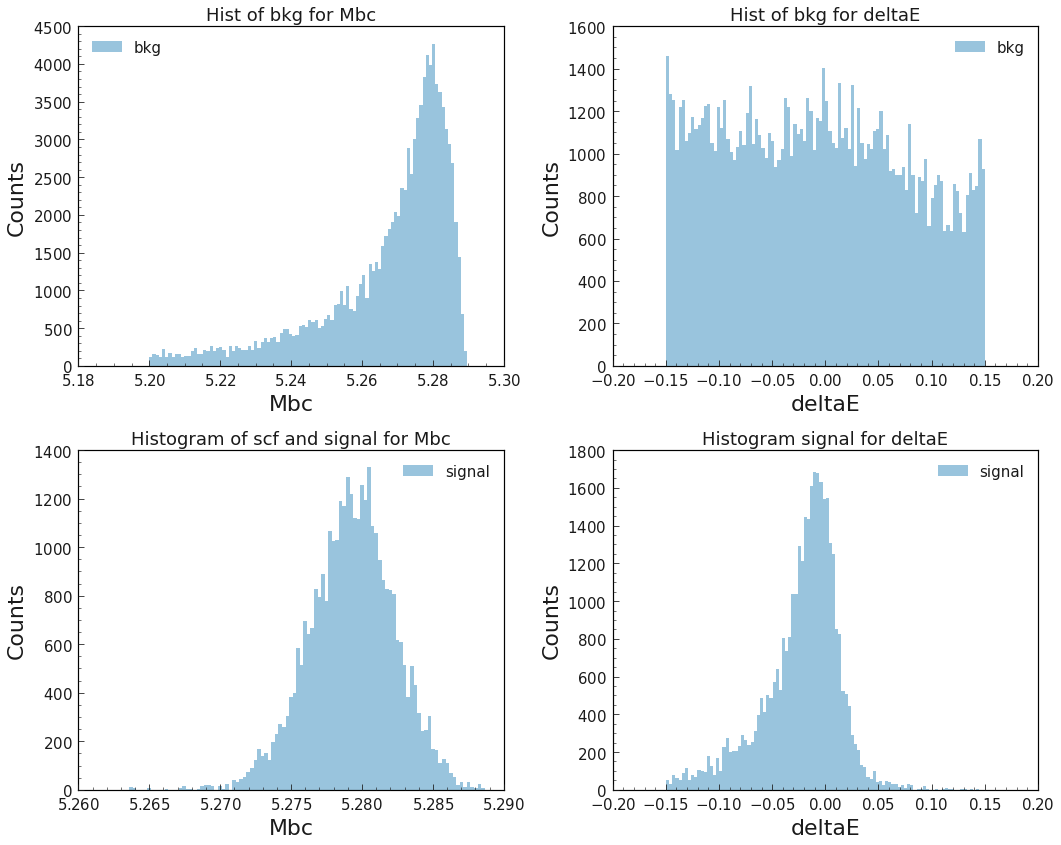

In [6]:
# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Mbc_bkg
plot_histogram(axs[0, 0],{"bkg":  mc_ele_bkg["Mbc"]},
               ["bkg"],
               {"bkg": mc_ele_bkg_weight},
               'Mbc', 'Counts', 'Hist of bkg for Mbc')

# deltaE_bkg
plot_histogram(axs[0, 1],{"bkg": mc_ele_bkg["deltaE"]},
               [ "bkg"],
               {"bkg": mc_ele_bkg_weight},
               'deltaE', 'Counts', 'Hist of bkg for deltaE')

# Mbc_signal 
plot_histogram(axs[1, 0],{"signal": mc_ele_signal["Mbc"]}, 
               ["signal"],
               {"signal": mc_ele_signal_weight}, 
               'Mbc', 'Counts', 'Histogram of scf and signal for Mbc')


# deltaE_signal
plot_histogram(axs[1, 1],{"signal": mc_ele_signal["deltaE"]}, 
               ["signal"],
               {"signal": mc_ele_signal_weight},
               'deltaE', 'Counts', 'Histogram signal for deltaE')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [7]:
#Signal
Mbc_ele_only_signal_cb,result_Mbc_signal= fit('Mbc', 'ele', 'signal', mc_ele_only_signal["Mbc"],mc_ele_only_signal_weight,'cb',11)
deltaE_ele_only_signal_cb_gauss,result_deltaE_signal= fit('deltaE', 'ele', 'signal', mc_ele_only_signal["deltaE"],mc_ele_only_signal_weight, 'cb_gauss',11)

#scf
Mbc_ele_scf_argus_gauss,result_Mbc_scf= fit('Mbc','ele', 'scf', mc_ele_scf["Mbc"],mc_ele_scf_weight, 'argus_gauss',11)
deltaE_ele_scf_poly_gauss,result_deltaE_scf= fit('deltaE','ele', 'scf', mc_ele_scf["deltaE"],mc_ele_scf_weight, 'poly_gauss',11)

#bkg_bkg
Mbc_ele_bkg_argus_gauss,result_Mbc_bkg= fit('Mbc', 'ele', 'bkg', mc_ele_bkg["Mbc"],mc_ele_bkg_weight, 'argus_gauss',11)
deltaE_ele_bkg_poly_gauss,result_deltaE_bkg = fit('deltaE', 'ele', 'bkg', mc_ele_bkg["deltaE"],mc_ele_bkg_weight, 'poly_gauss',11)


name                              value  (rounded)    at limit
------------------------------  ------------------  ----------
mu_ele_Mbc_signal_cb_0.4381                5.27934       False
sigma_ele_Mbc_signal_cb_0.4381          0.00266637       False
alpha_ele_Mbc_signal_cb_0.4381             1.77338       False
n_ele_Mbc_signal_cb_0.4381                 156.444       False
True
name                                      value  (rounded)    at limit
--------------------------------------  ------------------  ----------
frac_ele_deltaE_signal_cb_gauss_0.1914            0.880962       False
mu_ele_deltaE_signal_cb_0.1914                  -0.0059782       False
sigma_ele_deltaE_signal_cb_0.1914                0.0173978       False
alpha_ele_deltaE_signal_cb_0.1914                 0.616246       False
n_ele_deltaE_signal_cb_0.1914                      131.183       False
mu_ele_deltaE_signal_gauss_0.1914               -0.0592282       False
sigma_ele_deltaE_signal_gauss_0.1914             

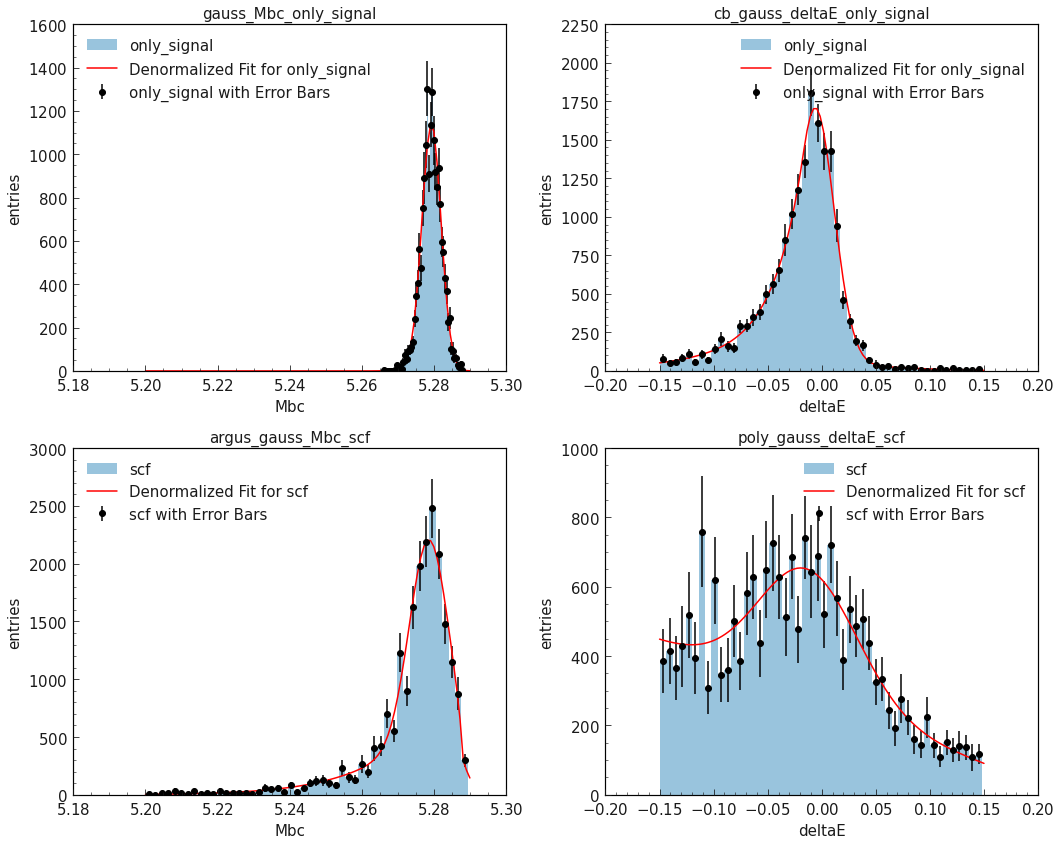

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(15, 12))  # Changed to 2 rows, 2 columns

Mbc_range = np.linspace(5.20, 5.29, 100)
deltaE_range = np.linspace(-0.15, 0.15, 100)

fit_model_Mbc_only_signal = plot_with_fit(axs[0, 0], 50, mc_ele_only_signal["Mbc"], mc_ele_only_signal_weight, 
                                           Mbc_ele_only_signal_cb, Mbc_range, 
                                           'only_signal', 'Denormalized Fit for only_signal', 
                                           'Mbc', 'entries', 'gauss_Mbc_only_signal')

fit_model_deltaE_only_signal = plot_with_fit(axs[0, 1], 50, mc_ele_only_signal["deltaE"], mc_ele_only_signal_weight, 
                                             deltaE_ele_only_signal_cb_gauss, deltaE_range, 
                                             'only_signal', 'Denormalized Fit for only_signal', 
                                             'deltaE', 'entries', 'cb_gauss_deltaE_only_signal')

fit_model_Mbc_scf = plot_with_fit(axs[1, 0], 50, mc_ele_scf["Mbc"], mc_ele_scf_weight, 
                                  Mbc_ele_scf_argus_gauss, Mbc_range, 
                                  'scf', 'Denormalized Fit for scf', 
                                  'Mbc', 'entries', 'argus_gauss_Mbc_scf')

fit_model_deltaE_scf = plot_with_fit(axs[1, 1], 50, mc_ele_scf["deltaE"], mc_ele_scf_weight, 
                                     deltaE_ele_scf_poly_gauss, deltaE_range, 
                                     'scf', 'Denormalized Fit for scf', 
                                     'deltaE', 'entries', 'poly_gauss_deltaE_scf')

# Adjust layout
plt.tight_layout()

# Print results if needed
print(result_Mbc_signal.params)
print(result_Mbc_signal.valid)
print(result_deltaE_signal.params)
print(result_deltaE_signal.valid)
print(result_Mbc_scf.params)
print(result_Mbc_scf.valid)
print(result_deltaE_scf.params)
print(result_deltaE_scf.valid)

# Show the plots
plt.show()


name                                   value  (rounded)    at limit
-----------------------------------  ------------------  ----------
frac_ele_Mbc_bkg_argus_gauss_0.8704             0.71914       False
m_ele_Mbc_bkg_argus_0.8704                      5.28846       False
c_ele_Mbc_bkg_argus_0.8704                     -131.676       False
p_ele_Mbc_bkg_argus_0.8704                      0.37647       False
mu_ele_Mbc_bkg_gauss_0.8704                     5.27877       False
sigma_ele_Mbc_bkg_gauss_0.8704               0.00485839       False
True
name                                     value  (rounded)    at limit
-------------------------------------  ------------------  ----------
frac_ele_deltaE_bkg_poly_gauss_0.4085            0.283581       False
coeff0_ele_deltaE_bkg_poly_0.4085               -0.621834       False
coeff1_ele_deltaE_bkg_poly_0.4085                0.991585       False
mu_ele_deltaE_bkg_gauss_0.4085                 0.00700565       False
sigma_ele_deltaE_bkg_gauss_0.40

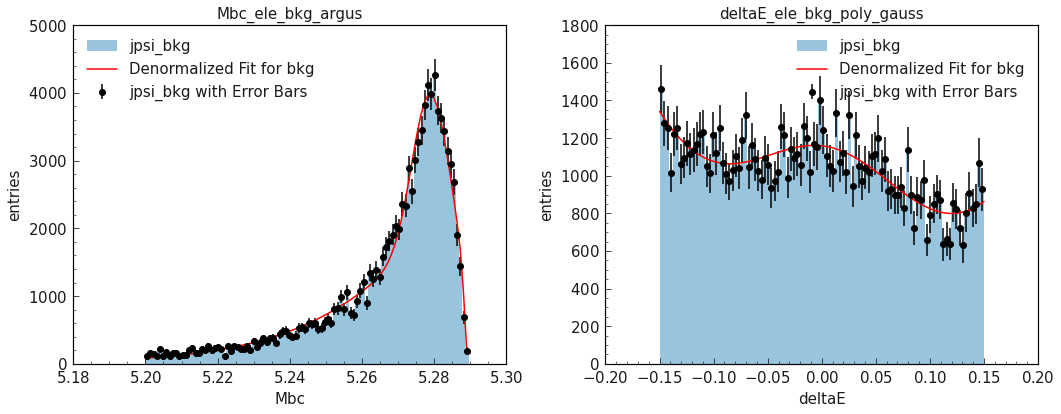

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Changed to 1 row, 2 columns

Mbc_range = np.linspace(5.20, 5.29, 100)
deltaE_range = np.linspace(-0.15, 0.15, 100)



fit_model_Mbc_jpsi_bkg = plot_with_fit(axs[0],100, mc_ele_bkg["Mbc"],mc_ele_bkg_weight, 
                                           Mbc_ele_bkg_argus_gauss, Mbc_range, 
                                           'jpsi_bkg', 'Denormalized Fit for bkg', 
                                           'Mbc', 'entries', 'Mbc_ele_bkg_argus')


fit_model_deltaE_jpsi_bkg = plot_with_fit(axs[1],100, mc_ele_bkg["deltaE"], mc_ele_bkg_weight, 
                                             deltaE_ele_bkg_poly_gauss, deltaE_range, 
                                             'jpsi_bkg', 'Denormalized Fit for bkg', 
                                             'deltaE', 'entries', 'deltaE_ele_bkg_poly_gauss')


# Adjust layout
plt.tight_layout()


# Print results if needed

print(result_Mbc_bkg.params)
print(result_Mbc_bkg.valid)
print(result_deltaE_bkg.params)
print(result_deltaE_bkg.valid)

# Show the plots
plt.show()


In [10]:
#Signal
Mbc_ele_only_signal_cb_fixed= fit_fixed('Mbc', 'ele', 'signal', mc_ele_only_signal["Mbc"],mc_ele_only_signal_weight,'cb',11)
deltaE_ele_only_signal_cb_gauss_fixed= fit_fixed('deltaE', 'ele', 'signal', mc_ele_only_signal["deltaE"],mc_ele_only_signal_weight, 'cb_gauss',11)

#scf
Mbc_ele_scf_argus_gauss_fixed= fit_fixed('Mbc','ele', 'scf', mc_ele_scf["Mbc"],mc_ele_scf_weight, 'argus_gauss',11)
deltaE_ele_scf_poly_gauss_fixed= fit_fixed('deltaE','ele', 'scf', mc_ele_scf["deltaE"],mc_ele_scf_weight, 'poly_gauss',11)

#bkg
Mbc_ele_bkg_argus_gauss_fixed= fit_fixed('Mbc', 'ele', 'bkg', mc_ele_bkg["Mbc"],mc_ele_bkg_weight, 'argus_gauss',11)
deltaE_ele_bkg_poly_gauss_fixed = fit_fixed('deltaE', 'ele', 'bkg', mc_ele_bkg["deltaE"],mc_ele_bkg_weight, 'poly_gauss',11)


In [11]:
Signal_Mbc = mc_ele_signal["Mbc"]
Signal_deltaE = mc_ele_signal["deltaE"]

Background_Mbc = mc_ele_bkg["Mbc"]
Background_deltaE = mc_ele_bkg["deltaE"]

Signal_total = pd.concat([Signal_Mbc, Signal_deltaE], axis=1)
Background_total = pd.concat([Background_Mbc, Background_deltaE], axis=1)

Signal_weight = mc_ele_signal_weight
Background_weight = mc_ele_bkg_weight


Mbc_signal_pdf,deltaE_signal_pdf,Mbc_background_pdf,deltaE_background_pdf,signal_extended, background_extended, total_model, result = fit_extended_model_scf(
    Mbc_ele_only_signal_cb_fixed,Mbc_ele_scf_argus_gauss_fixed,deltaE_ele_only_signal_cb_gauss_fixed,deltaE_ele_scf_poly_gauss_fixed,
    Mbc_ele_bkg_argus_gauss_fixed,deltaE_ele_bkg_poly_gauss_fixed,
    pd.concat([Signal_total, Background_total]),
    pd.concat([Signal_weight, Background_weight]),0.5,0.5,1000,1000
)

#result.hesse(name='hesse')
result.errors(name='errors')
print(result.params)
print(result.valid)

/afs/desy.de/user/j/jipatel/.local/lib/python3.8/site-packages/zfit/core/basepdf.py:585: UserWarning: As `copy` is not yet properly implemented, this may fails (for ProductPDF for example?). Thiswill be fixed in the future.
  warnings.warn(
/afs/desy.de/user/j/jipatel/.local/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:1340: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn(


name                                      value  (rounded)               errors    at limit
--------------------------------------  ------------------  -------------------  ----------
signal_yield_0.8358                                38329.3  -3.9e+02   +3.8e+02       False
background_yield_0.8358                             100794  -4.5e+02   +4.6e+02       False
mu_ele_Mbc_signal_cb_0.502                         5.27954  -1.9e-05   +  2e-05       False
frac_ele_deltaE_signal_cb_gauss_0.5235            0.911895  -   0.01   +  0.011       False
frac_Mbc_bkg1_0.8358                              0.866461  - 0.0025   + 0.0025       False
frac_ele_Mbc_scf_argus_gauss_0.4365              0.0984868  -  0.015   +  0.015       False
frac_ele_Mbc_bkg_argus_gauss_0.0683                4.89224  -  0.026   +  0.029       False
frac_deltaE_bkg1_0.8358                         -0.0108368  -0.00091   + 0.0009       False
frac_ele_deltaE_scf_poly_gauss_0.2998             -7.86287  -  0.077   +  0.077 

In [12]:
process_fit_and_mc_results(result, signal_extended, background_extended, mc_ele_signal_weight,  mc_ele_bkg_weight, 
                               11, 'ee', 0.0812, 'Bp','JPsi',apply_correction=True)

Results from Fit:
Signal Events = 38329.317
Background Events = 100794.366

Results from MC Data:
Signal Events in MC Data = 35211.517
Background Events in MC Data = 103943.045

Signal Events difference = -3117.8
Background Events difference = 3148.679
B_to_K*_JPsi_Branching_ratio(Fit Data): 0.001325+/-0.000015
B_to_K*_JPsi_Branching_ratio(MC Data): 0.001217+/-0.000007
B_to_K*_JPsi_Branching_ratio_from_PDG: 0.00143+/-0.00008


In [13]:
process_fit_and_mc_results(result, signal_extended, background_extended, mc_ele_signal_weight,  mc_ele_bkg_weight, 
                               11, 'ee', 0.0812, 'Bp','JPsi',apply_correction=False)

Results from Fit:
Signal Events = 38329.317
Background Events = 100794.366

Results from MC Data:
Signal Events in MC Data = 35211.517
Background Events in MC Data = 103943.045

Signal Events difference = -3117.8
Background Events difference = 3148.679
B_to_K*_JPsi_Branching_ratio(Fit Data): 0.001225+/-0.000014
B_to_K*_JPsi_Branching_ratio(MC Data): 0.001126+/-0.000006
B_to_K*_JPsi_Branching_ratio_from_PDG: 0.00143+/-0.00008


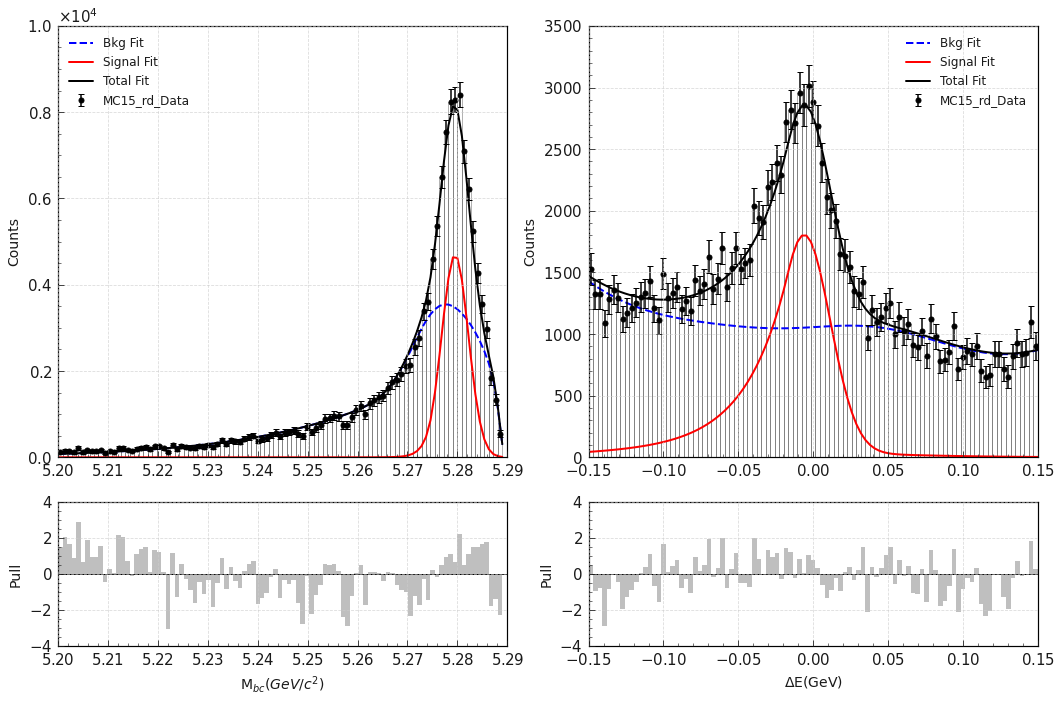

In [14]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'height_ratios': [3, 1]})

# Plot Mbc
plot_variable(axs[0, 0], axs[1, 0], "Mbc", mc_ele_signal, mc_ele_bkg,mc_ele_signal_weight, mc_ele_bkg_weight,  
              Mbc_signal_pdf, Mbc_background_pdf, "Signal Fit", "Bkg Fit", "M$_{bc}(GeV/c^2)$")

# Plot deltaE
plot_variable(axs[0, 1], axs[1, 1], "deltaE", mc_ele_signal, mc_ele_bkg,mc_ele_signal_weight, mc_ele_bkg_weight,  
              deltaE_signal_pdf, deltaE_background_pdf, "Signal Fit", "Bkg Fit", '$\\Delta$E(GeV)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.savefig('Bpeepi0_JPsi_decay_ee.pdf')
plt.show()
